In [4]:
import pandas as pd

train_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
test_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')


In [5]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
# Suppression des colonne inutile et d'autres colonnes non pertinentes
train_data = train_data.drop(['Unnamed: 0', 'cc_num', 'trans_num', 'street', 'first','last'], axis=1)
test_data = test_data.drop(['Unnamed: 0', 'cc_num', 'trans_num', 'street', 'first','last'], axis=1)


In [8]:
train_data.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   merchant               1296675 non-null  object 
 2   category               1296675 non-null  object 
 3   amt                    1296675 non-null  float64
 4   gender                 1296675 non-null  object 
 5   city                   1296675 non-null  object 
 6   state                  1296675 non-null  object 
 7   zip                    1296675 non-null  int64  
 8   lat                    1296675 non-null  float64
 9   long                   1296675 non-null  float64
 10  city_pop               1296675 non-null  int64  
 11  job                    1296675 non-null  object 
 12  dob                    1296675 non-null  object 
 13  unix_time              1296675 non-null  int64  
 14  merch_lat         

In [10]:
# Conversion de la colonne date
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['trans_hour'] = train_data['trans_date_trans_time'].dt.hour
train_data['trans_day'] = train_data['trans_date_trans_time'].dt.day
train_data['trans_month'] = train_data['trans_date_trans_time'].dt.month
train_data = train_data.drop('trans_date_trans_time', axis=1)


In [11]:
# Conversion de la colonne date dans les données de test
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['trans_hour'] = test_data['trans_date_trans_time'].dt.hour
test_data['trans_day'] = test_data['trans_date_trans_time'].dt.day
test_data['trans_month'] = test_data['trans_date_trans_time'].dt.month
test_data = test_data.drop('trans_date_trans_time', axis=1)


In [12]:
test_data.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_month
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0,12,21,6
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0,12,21,6
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0,12,21,6
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0,12,21,6
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0,12,21,6


In [13]:
print(train_data.columns)


Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'trans_day', 'trans_month'],
      dtype='object')


In [14]:
from datetime import datetime

# Fonction pour calculer l'âge à partir de la date de naissance
def calculate_age(dob):
    today = datetime.today()
    dob = pd.to_datetime(dob)  # Conversion en format datetime
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))



In [15]:

# Appliquer la fonction pour créer une nouvelle colonne 'age'
train_data['age'] = train_data['dob'].apply(calculate_age)
test_data['age'] = test_data['dob'].apply(calculate_age)


In [16]:
# Suppression de la colonne 'dob'
train_data = train_data.drop(columns=['dob'])
test_data = test_data.drop(columns=['dob'])

# Affichage des premières lignes avec l'âge
print(train_data.head())
print(test_data.head())

                             merchant       category     amt gender  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                fraud_Lind-Buckridge  entertainment  220.11      M   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                 fraud_Keeling-Crist       misc_pos   41.96      M   

             city state    zip      lat      long  city_pop  \
0  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1          Orient    WA  99160  48.8878 -118.2105       149   
2      Malad City    ID  83252  42.1808 -112.2620      4154   
3         Boulder    MT  59632  46.2306 -112.1138      1939   
4        Doe Hill    VA  24433  38.4207  -79.4629        99   

                                 job   unix_time  merch_lat  merch_long  \
0          Psychologist, counselling  1325376018  36.011293  -82.048315   
1  Special educational needs teacher  132537

In [17]:
from sklearn.preprocessing import LabelEncoder
# Concaténation des ensembles pour l'encodage
combined_data = pd.concat([train_data, test_data], keys=['train', 'test'])

combined_data = pd.get_dummies(combined_data, columns=['gender', 'state'], drop_first=True)

# Label Encoding pour le 'merchant' et le 'job'
le = LabelEncoder()
combined_data['merchant'] = le.fit_transform(combined_data['merchant'])
combined_data['job'] = le.fit_transform(combined_data['job'])

mean_target_city = combined_data.groupby('city')['is_fraud'].mean()
combined_data['city'] = combined_data['city'].map(mean_target_city)

mean_target = combined_data.groupby('category')['is_fraud'].mean()
combined_data['category'] = combined_data['category'].map(mean_target)


# Séparer à nouveau les ensembles train et test
train_encoded = combined_data.xs('train')
test_encoded = combined_data.xs('test')

# Afficher les DataFrames encodés

train_encoded.head()


,merchant,category,amt,city,zip,lat,long,city_pop,job,unix_time,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,514,0.013039,4.97,0.003758,28654,36.0788,-81.1781,3495,372,1325376018,...,False,False,False,False,False,False,False,False,False,False
1,241,0.012645,107.23,0.002160,99160,48.8878,-118.2105,149,431,1325376044,...,False,False,False,False,False,False,True,False,False,False
2,390,0.002177,220.11,0.010884,83252,42.1808,-112.2620,4154,308,1325376051,...,False,False,False,False,False,False,False,False,False,False
3,360,0.004106,45.00,0.020188,59632,46.2306,-112.1138,1939,330,1325376076,...,False,False,False,False,False,False,False,False,False,False
4,297,0.002819,41.96,0.004449,24433,38.4207,-79.4629,99,116,1325376186,...,False,False,False,False,True,False,False,False,False,False


In [18]:
# Identifier les colonnes booléennes
bool_cols = combined_data.select_dtypes(include=['bool']).columns

train_encoded[bool_cols] = train_encoded[bool_cols].astype(int)
test_encoded[bool_cols] = test_encoded[bool_cols].astype(int)



/tmp/ipykernel_36/1188410509.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_encoded[bool_cols] = train_encoded[bool_cols].astype(int)
/tmp/ipykernel_36/1188410509.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_encoded[bool_cols] = test_encoded[bool_cols].astype(int)


In [19]:

train_encoded.head()

,merchant,category,amt,city,zip,lat,long,city_pop,job,unix_time,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,514,0.013039,4.97,0.003758,28654,36.0788,-81.1781,3495,372,1325376018,...,0,0,0,0,0,0,0,0,0,0
1,241,0.012645,107.23,0.002160,99160,48.8878,-118.2105,149,431,1325376044,...,0,0,0,0,0,0,1,0,0,0
2,390,0.002177,220.11,0.010884,83252,42.1808,-112.2620,4154,308,1325376051,...,0,0,0,0,0,0,0,0,0,0
3,360,0.004106,45.00,0.020188,59632,46.2306,-112.1138,1939,330,1325376076,...,0,0,0,0,0,0,0,0,0,0
4,297,0.002819,41.96,0.004449,24433,38.4207,-79.4629,99,116,1325376186,...,0,0,0,0,1,0,0,0,0,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


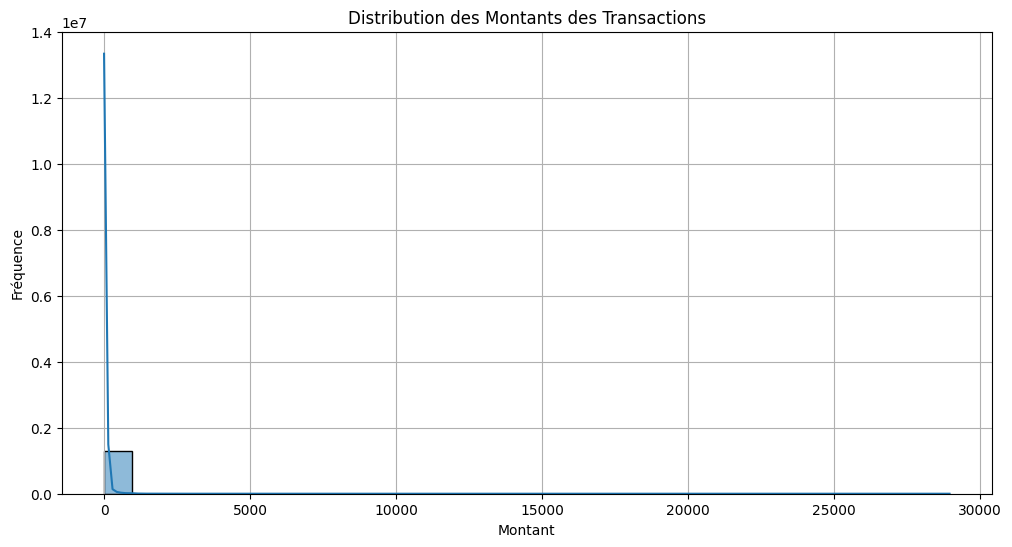

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


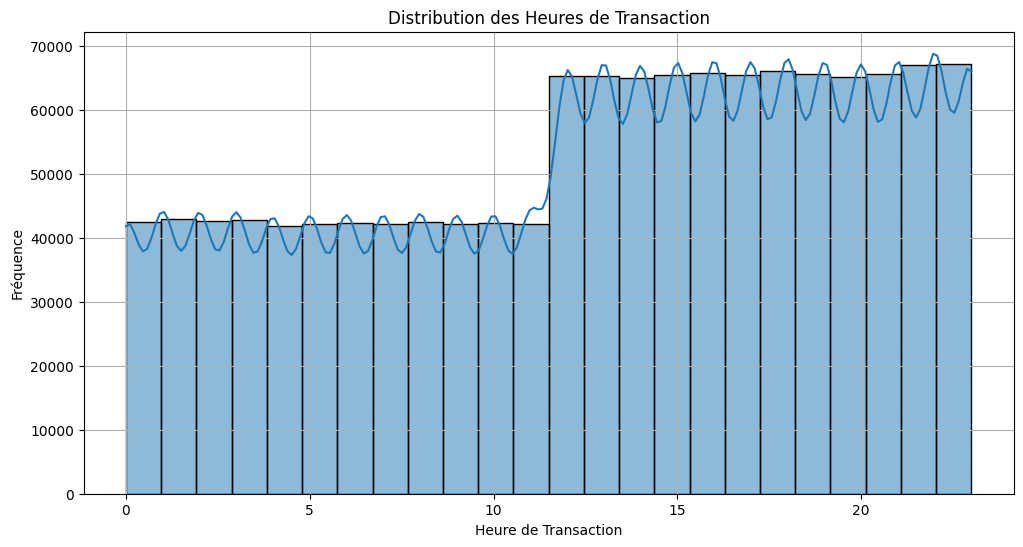

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


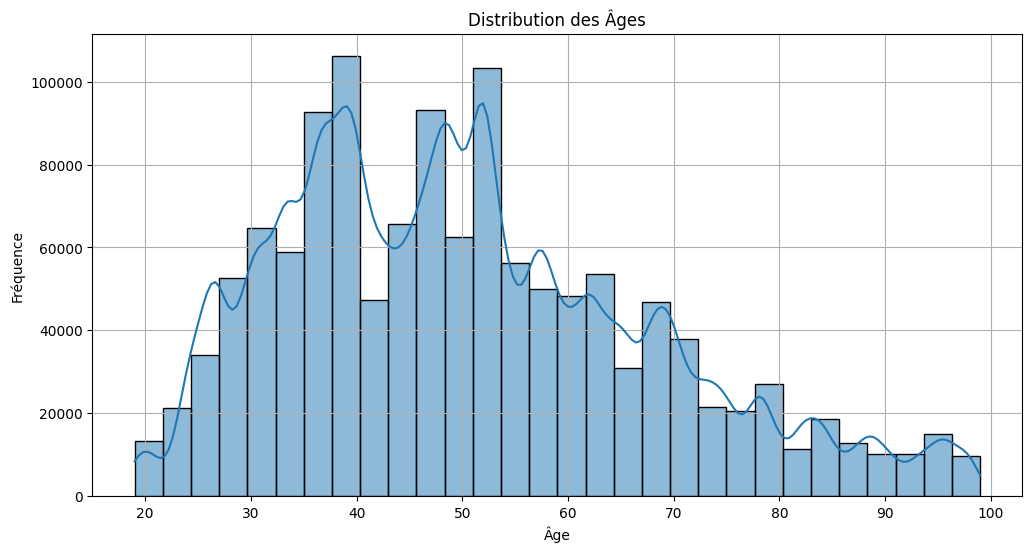

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que df_encoded soit votre DataFrame après l'encodage
# Visualiser la distribution de 'amt'
plt.figure(figsize=(12, 6))
sns.histplot(train_encoded['amt'], bins=30, kde=True)
plt.title('Distribution des Montants des Transactions')
plt.xlabel('Montant')
plt.ylabel('Fréquence')
plt.grid()
plt.show()

# Visualiser la distribution de 'trans_hour'
plt.figure(figsize=(12, 6))
sns.histplot(train_encoded['trans_hour'], bins=24, kde=True)
plt.title('Distribution des Heures de Transaction')
plt.xlabel('Heure de Transaction')
plt.ylabel('Fréquence')
plt.grid()
plt.show()

# Visualiser la distribution de 'age'
plt.figure(figsize=(12, 6))
sns.histplot(train_encoded['age'], bins=30, kde=True)
plt.title('Distribution des Âges')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.grid()
plt.show()


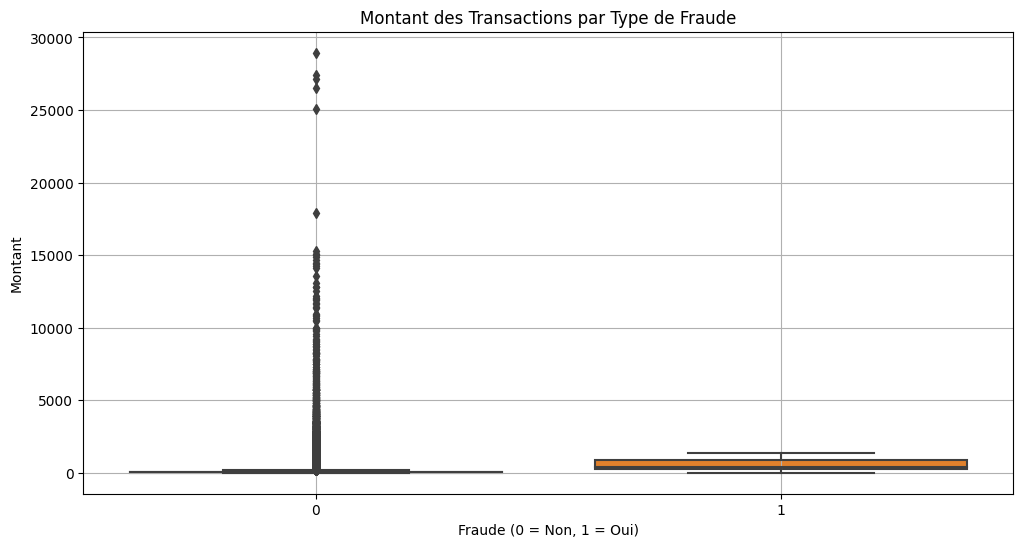

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_fraud', y='amt', data=train_encoded)
plt.title('Montant des Transactions par Type de Fraude')
plt.xlabel('Fraude (0 = Non, 1 = Oui)')
plt.ylabel('Montant')
plt.grid()
plt.show()


In [22]:
print(train_encoded.dtypes)


merchant      int64
category    float64
amt         float64
city        float64
zip           int64
             ...   
state_VT      int64
state_WA      int64
state_WI      int64
state_WV      int64
state_WY      int64
Length: 68, dtype: object


In [23]:
train_encoded.isnull().sum()

merchant    0
category    0
amt         0
city        0
zip         0
           ..
state_VT    0
state_WA    0
state_WI    0
state_WV    0
state_WY    0
Length: 68, dtype: int64

In [24]:
# Afficher la distribution des classes
class_distribution = train_encoded['is_fraud'].value_counts()
print(class_distribution)


is_fraud
0    1289169
1       7506
Name: count, dtype: int64


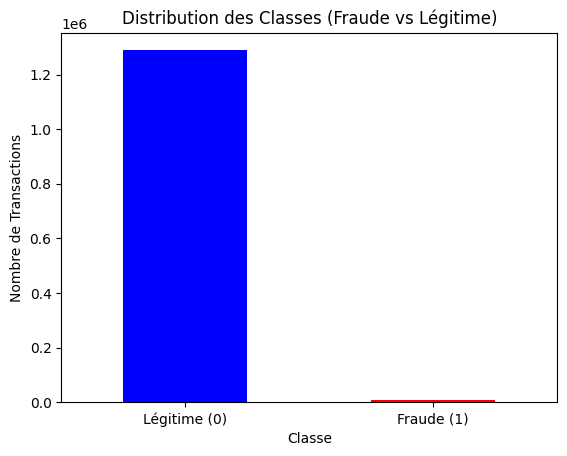

In [25]:
import matplotlib.pyplot as plt

# Diagramme à barres pour les classes
class_counts = train_encoded['is_fraud'].value_counts()
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution des Classes (Fraude vs Légitime)')
plt.xlabel('Classe')
plt.ylabel('Nombre de Transactions')
plt.xticks(ticks=[0, 1], labels=['Légitime (0)', 'Fraude (1)'], rotation=0)
plt.show()


In [27]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Sélectionner la classe majoritaire (non frauduleuse) et la minoritaire (frauduleuse)
legit = train_encoded[train_encoded.is_fraud == 0]
fraud = train_encoded[train_encoded.is_fraud == 1]

# Séparez vos caractéristiques et votre cible
X = train_encoded.drop('is_fraud', axis=1)  
y = train_encoded['is_fraud']                

# Appliquer SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Créer un DataFrame avec les données suréchantillonnées
train_encoded_remplased = pd.DataFrame(X_resampled, columns=X.columns)
train_encoded_remplased['is_fraud'] = y_resampled

# Vérification de la distribution des classes après suréchantillonnage
print("Distribution des classes après SMOTE :")
print(train_encoded_remplased['is_fraud'].value_counts())




Distribution des classes après SMOTE :
is_fraud
0    1289169
1    1289169
Name: count, dtype: int64


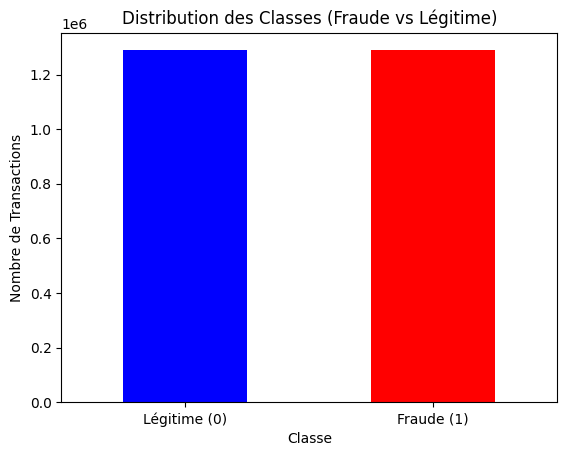

In [28]:
import matplotlib.pyplot as plt

# Diagramme à barres pour les classes
class_counts = train_encoded_remplased['is_fraud'].value_counts()
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution des Classes (Fraude vs Légitime)')
plt.xlabel('Classe')
plt.ylabel('Nombre de Transactions')
plt.xticks(ticks=[0, 1], labels=['Légitime (0)', 'Fraude (1)'], rotation=0)
plt.show()


In [29]:
# Séparation des caractéristiques et de la cible

X_train = train_encoded_remplased.drop('is_fraud', axis=1)
y_train = train_encoded_remplased['is_fraud']



In [30]:

X_test = test_encoded.drop('is_fraud', axis=1)
y_test = test_encoded['is_fraud']

In [32]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2578338, 67)
y_train shape: (2578338,)
X_test shape: (555719, 67)
y_test shape: (555719,)


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement du modèle avec Random Forest
rf_model = RandomForestClassifier(random_state=1000)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=1000)

In [34]:
# Prédiction sur les données de test
y_test_pred = rf_model.predict(X_test) 

In [35]:
from sklearn.metrics import classification_report
# Évaluation des performances
print("Rapport de Classification:\n", classification_report(y_test, y_test_pred))

Rapport de Classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.93      0.35      0.51      2145

    accuracy                           1.00    555719
   macro avg       0.96      0.68      0.76    555719
weighted avg       1.00      1.00      1.00    555719



In [36]:
from sklearn.tree import DecisionTreeClassifier

# Entraînement du modèle d'arbre de décision
decision_tree_model = DecisionTreeClassifier(random_state=1000)
decision_tree_model.fit(X_train, y_train)

# Prédictions
y_pred_tree = decision_tree_model.predict(X_test)

# Évaluation
print(classification_report(y_test, y_pred_tree))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.35      0.73      0.47      2145

    accuracy                           0.99    555719
   macro avg       0.67      0.86      0.73    555719
weighted avg       1.00      0.99      0.99    555719



In [39]:
import joblib

# Enregistrer le modèle
joblib.dump(decision_tree_model, 'decision_tree_model.pkl')

print("Modèle d'arbre de décision enregistré sous 'decision_tree_model.pkl'")

Modèle d'arbre de décision enregistré sous 'decision_tree_model.pkl'


In [40]:
# Charger le modèle
loaded_model = joblib.load('decision_tree_model.pkl')